## 1. Examples for comparison across models

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import cv2

In [ ]:
# Import training set
df_train = pd.read_csv('/content/drive/MyDrive/BT5153/Data/df_train_v4.csv')

# Import predictions from Transformer 2 
t2_pred = pd.read_csv('/content/drive/MyDrive/BT5153/Data/Validation Results/Transformer2_BLEU and ROUGE.csv')
# Import predictions from LSTM
lstm_pred = pd.read_csv('/content/drive/MyDrive/BT5153/Data/Validation Results/validation_LSTMv2_BLEU.csv')
# Import predictions from Transformer 1
t1_pred = pd.read_csv('/content/drive/MyDrive/BT5153/Data/Validation Results/Rouge/Transformer1_Validation_Result.csv')

In [ ]:
# Sort all dataframes
t1_pred = t1_pred.sort_values('img_id').reset_index()
t2_pred = t2_pred.sort_values('img_id').reset_index()
lstm_pred = lstm_pred.sort_values('img_id').reset_index()

Generated from Transformer2: neck top in soft cotton jersey with a round neckline and long sleeves                                                
Generated from LSTM: a knit top featuring a v neckline long sleeves and a crew neck
Generated from Transformer1: a knit tee featuring a crew neck long sleeves and a crew neck
Actual: a woven top featuring a round neckline tiered long bell sleeves with a floral crochet panel shirred accents on the waist seam keyhole back with button loop closure and a relaxed fit
Product name: Bell Sleeve Crochet-Panel Top


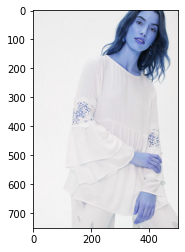

In [ ]:
# Example 1
id_to_plot = 1392
pred = t2_pred['pred_cap'][id_to_plot]
actual = t2_pred.iloc[id_to_plot]['description']
img = cv2.imread(t2_pred.iloc[id_to_plot]['img_path'])
plt.imshow(img)
print('Generated from Transformer2: {}'.format(pred))
print('Generated from LSTM: {}'.format(lstm_pred['predicted_caption'][id_to_plot]))
print('Generated from Transformer1: {}'.format(t1_pred['predicted_caption'][id_to_plot]))
print('Actual: {}'.format(actual))
print('Product name: {}'.format(t2_pred.iloc[id_to_plot]['title']))

Generated from Transformer2: neck pockets and hem give this jumper a feminine look                                                   
Generated from LSTM: a knit top featuring a v neckline long sleeves and a crew neck
Generated from Transformer1: a knit top featuring a crew neck long sleeves and a crew neck
Actual: a knit sweater featuring a ribbed bodice and sleeve cuffs long sleeves shirred shoulders and a mock neck
Product name: Mock Neck Ribbed Sweater


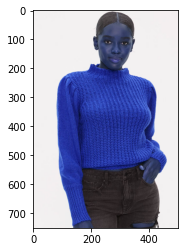

In [ ]:
# Example 2
id_to_plot = 1850
pred = t2_pred['pred_cap'][id_to_plot]
actual = t2_pred.iloc[id_to_plot]['description']
img = cv2.imread(t2_pred.iloc[id_to_plot]['img_path'])
plt.imshow(img)
print('Generated from Transformer2: {}'.format(pred))
print('Generated from LSTM: {}'.format(lstm_pred['predicted_caption'][id_to_plot]))
print('Generated from Transformer1: {}'.format(t1_pred['predicted_caption'][id_to_plot]))
print('Actual: {}'.format(actual))
print('Product name: {}'.format(t2_pred.iloc[id_to_plot]['title']))

Generated from Transformer2: jacket in woven fabric with a round neckline and long sleeves                                                  
Generated from LSTM: a knit top featuring a v neckline long sleeves and a crew neck
Generated from Transformer1: this long sleeve top with a relaxed fit and a classic fit
Actual: a knit top featuring an allover striped pattern dropped long sleeves and a round neckline
Product name: Striped Drop-Sleeve Top


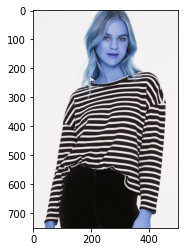

In [ ]:
# Example 3
id_to_plot = 2231 
pred = t2_pred['pred_cap'][id_to_plot]
actual = t2_pred.iloc[id_to_plot]['description']
img = cv2.imread(t2_pred.iloc[id_to_plot]['img_path'])
plt.imshow(img)
print('Generated from Transformer2: {}'.format(pred))
print('Generated from LSTM: {}'.format(lstm_pred['predicted_caption'][id_to_plot]))
print('Generated from Transformer1: {}'.format(t1_pred['predicted_caption'][id_to_plot]))
print('Actual: {}'.format(actual))
print('Product name: {}'.format(t2_pred.iloc[id_to_plot]['title']))

##2. Analyse performance of Transformer 2

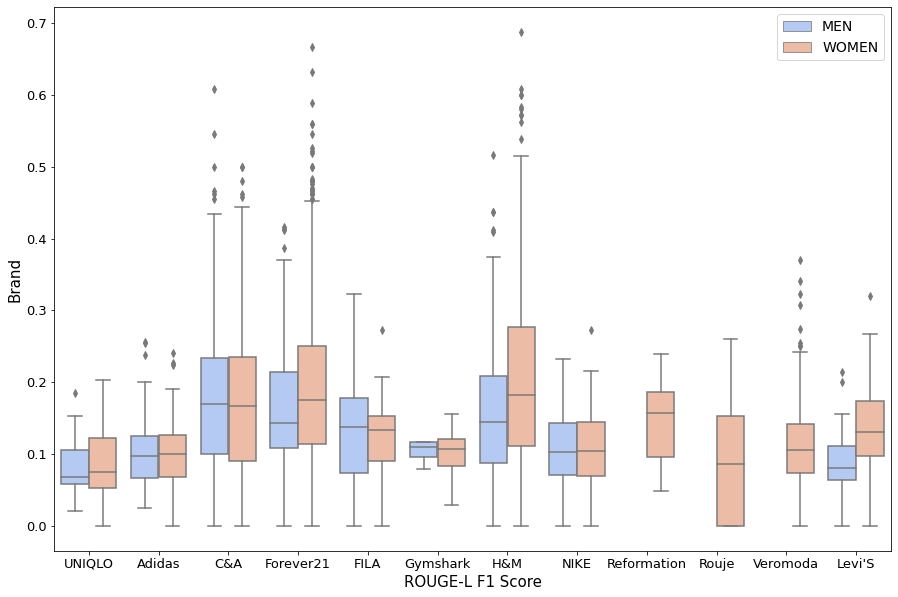

In [ ]:
# Plot boxplot of rouge L F1 scores by gender and brand
plt.figure(figsize=(15,10))
sns.boxplot(data=t2_pred, y='rouge-1_f', x='brand', orient='v', hue='sex', palette='coolwarm')
plt.xlabel('ROUGE-L F1 Score', size=15)
plt.ylabel('Brand', size=15)
plt.legend(loc='upper right', prop={'size': 14})
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

In [ ]:
# Count of samples in training set by brand
brand_count = df_train.groupby(['brand', 'sex'])['img_id'].count().reset_index()
brand_count.columns = ['brand', 'sex', 'count']

# Mean score by brand
brand_mean = t2_pred.groupby(['brand', 'sex'])['rouge-1_f'].mean().reset_index()

# Merge with training counts
brand_mean = pd.merge(brand_mean, brand_count, on=['brand', 'sex'])
brand_mean

,brand,sex,rouge-1_f,count
0,Adidas,MEN,0.099358,693
1,Adidas,WOMEN,0.102364,448
2,C&A,MEN,0.182421,859
3,C&A,WOMEN,0.170451,2322
4,FILA,MEN,0.128339,208
5,FILA,WOMEN,0.126115,60
6,Forever21,MEN,0.167026,572
7,Forever21,WOMEN,0.188025,4174
8,Gymshark,MEN,0.104140,25
9,Gymshark,WOMEN,0.100197,52


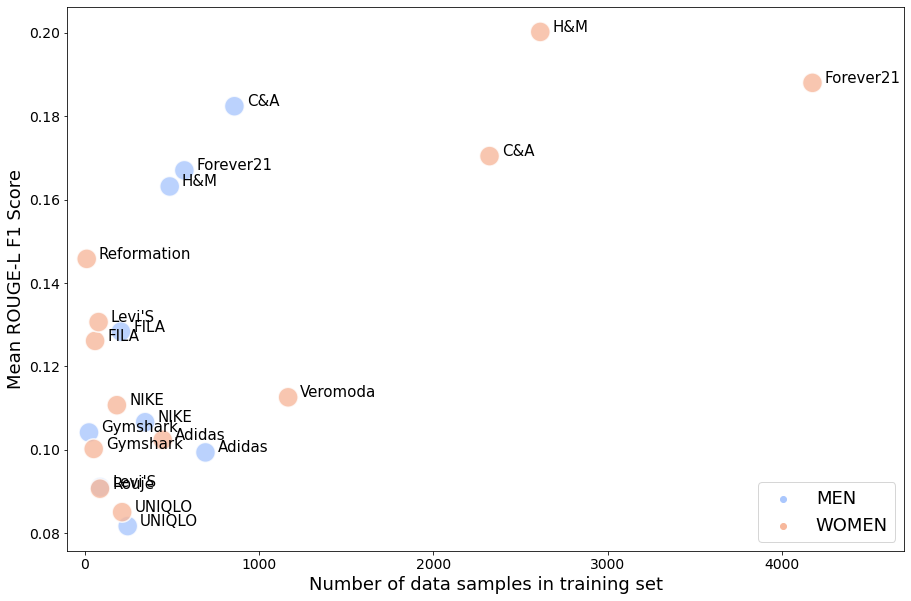

In [ ]:
# Scatterplot of mean rouge L F1 scores by data size in training set, labelled by brand and gender
plt.figure(figsize=(15,10))
sns.scatterplot(data=brand_mean, x='count', y='rouge-1_f', hue='sex', s=400, palette='coolwarm', alpha=0.8)
for line in range(0,brand_mean.shape[0]):
     plt.text(brand_mean['count'][line]+70, brand_mean['rouge-1_f'][line], brand_mean['brand'][line], horizontalalignment='left', fontsize=15, color='black')
plt.legend(loc='lower right', prop={'size': 18})
plt.xlabel('Number of data samples in training set', size=18)
plt.ylabel('Mean ROUGE-L F1 Score', size=18)
plt.xlim(-100, 4700)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

## 3. Case Studies with Saliency Map for Transformer 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install tf-keras-vis tensorflow

In [ ]:
import pandas as pd 
import requests
import tensorflow as tf
import string
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (LSTM, Embedding, Bidirectional,
    TimeDistributed, Dense, RepeatVector, 
    Activation, Flatten, Reshape, concatenate,  
    Dropout, BatchNormalization)

from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import Input, layers
from tensorflow.keras import optimizers

from tensorflow.keras.models import Model

from tensorflow.keras.layers import add
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.layers import Embedding

import os

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# read data_processed.csv
data_path = '/content/drive/MyDrive/Colab Notebooks/BT5153/Data'

In [ ]:
df_validation = pd.read_csv(os.path.join('/content/drive/MyDrive/Colab Notebooks/BT5153/Codes/Transformer_HJ/df_validation.csv'), encoding = 'unicode_escape')
df_validation.shape

(3736, 19)

In [ ]:
df_validation.head(2)

,Unnamed: 0,index,Unnamed: 0.1,img_id,title,img_url,description,sex,material,price,brand,colour,Description,img_path,pred_cap,bleu1,bleu2,bleu3,bleu4
0,0,1,1,1,MEN Easy Shorts (Printed),https://d15udtvdbbfasl.cloudfront.net/catalog/...,light and cool shorts are perfect for relaxing...,MEN,100% Cotton,19.9,UNIQLO,Color: COL37 BROWN,ss light and cool shorts are perfect for relax...,/content/drive/MyDrive/BT5153/Data/Pict/1.jpg,a classic design for easy colours ...,0.004375,0.001072,0.000965,0.000637
1,1,5,6,6,MEN Stretch Slim Fit Shorts (Pattern),https://d15udtvdbbfasl.cloudfront.net/catalog/...,chic shorts with clean lines and a sleek cut w...,MEN,"98% Cotton, 2% Spandex",29.9,UNIQLO,Color: COL07 GRAY,ss chic shorts with clean lines and a sleek cu...,/content/drive/MyDrive/BT5153/Data/Pict/6.jpg,and comfortable cotton shorts featuring a uniq...,0.043138,0.006471,0.004888,0.002784


In [ ]:
# # add img paths
df_validation['img_path'] = df_validation.img_id.apply(lambda x: data_path + '/Pict/' + str(x) + '.jpg')
df_validation.head()

,Unnamed: 0,index,Unnamed: 0.1,img_id,title,img_url,description,sex,material,price,brand,colour,Description,img_path,pred_cap,bleu1,bleu2,bleu3,bleu4
0,0,1,1,1,MEN Easy Shorts (Printed),https://d15udtvdbbfasl.cloudfront.net/catalog/...,light and cool shorts are perfect for relaxing...,MEN,100% Cotton,19.9,UNIQLO,Color: COL37 BROWN,ss light and cool shorts are perfect for relax...,/content/drive/MyDrive/Colab Notebooks/BT5153/...,a classic design for easy colours ...,0.004375,0.001072,0.000965,0.000637
1,1,5,6,6,MEN Stretch Slim Fit Shorts (Pattern),https://d15udtvdbbfasl.cloudfront.net/catalog/...,chic shorts with clean lines and a sleek cut w...,MEN,"98% Cotton, 2% Spandex",29.9,UNIQLO,Color: COL07 GRAY,ss chic shorts with clean lines and a sleek cu...,/content/drive/MyDrive/Colab Notebooks/BT5153/...,and comfortable cotton shorts featuring a uniq...,0.043138,0.006471,0.004888,0.002784
2,2,13,15,15,MEN Easy Shorts (Jersey),https://d15udtvdbbfasl.cloudfront.net/catalog/...,these relaxed pants are soft and comfortable s...,MEN,"67% Cotton, 27% Polyester, 6% Spandex",14.9,UNIQLO,Color: COL65 Blue,ss these relaxed pants are soft and comfortabl...,/content/drive/MyDrive/Colab Notebooks/BT5153/...,and sporty design the it sportswear constructi...,0.093063,0.021595,0.020064,0.011065
3,3,16,18,18,MEN Dry Stretch Easy Shorts,https://d15udtvdbbfasl.cloudfront.net/catalog/...,comfortable versatile shorts perfect for weari...,MEN,"67% Cotton, 33% Polyester",19.9,UNIQLO,Color: COL09 BLACK,ss comfortable versatile shorts perfect for we...,/content/drive/MyDrive/Colab Notebooks/BT5153/...,dress with a bold tie dye finish ...,0.007112,0.002429,0.002514,0.001645
4,4,22,25,25,MEN Ultra Stretch Active Shorts,https://d15udtvdbbfasl.cloudfront.net/catalog/...,incredible functionality and stylish design si...,MEN,100% Polyester,29.9,UNIQLO,Color: COL03 GRAY,ss incredible functionality and stylish design...,/content/drive/MyDrive/Colab Notebooks/BT5153/...,shorts with a detachable tie belt at the waist...,0.031479,0.007352,0.006766,0.003826


In [ ]:
# load image and preprocess to the format compatible to inception_v3
import cv2
def load_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (299, 299))
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    
    return img

In [ ]:
# define InceptionV3 image feature extraction model 
image_model = tf.keras.applications.InceptionV3(include_top=True,
                                                weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-2].output
image_features_extract_model = tf.keras.Model(new_input, hidden_layer)


96116736/96112376 [==============================] - 1s 0us/step


In [ ]:
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize

def model_modifier(m):
    m.layers[-2].activation = tf.keras.activations.linear
    return m

saliency = Saliency(image_model,
                    model_modifier=model_modifier,
                    clone=False)

def loss(output):
    return output

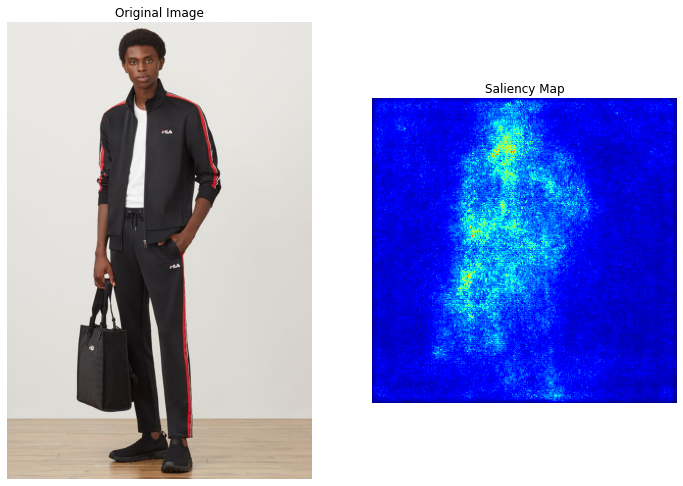



Title: FILA Milano knit track pant
Actual: a laid back yet luxurious look is achieved with these track pants that call back to our archives while also staying relevant to present style
Generated: the it sportswear jacket are made of soft woven fabric and a timeless design                                               


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

id = 17488

photo_url = df_validation[df_validation.img_id == id].img_path.values[0]
photo = load_image(photo_url)
photo = tf.reshape(photo,(1,photo.shape[0],photo.shape[1],photo.shape[2]))
title = df_validation[df_validation.img_id == id].title.values[0]
actual_caption = df_validation[df_validation.img_id == id].description.values[0]
predicted_caption = df_validation[df_validation.img_id == id].pred_cap.values[0]


saliency_map = saliency(loss,
                        photo,
                        smooth_samples=20, # The number of calculating gradients iterations.
                        smooth_noise=0.2) # noise spread level.
saliency_map = normalize(saliency_map)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,9))

img = cv2.imread(df_validation[df_validation.img_id == id].img_path.values[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

ax[0].imshow(img)
ax[0].axis('off')
ax[0].set_title('Original Image')
ax[1].imshow(saliency_map[0], cmap='jet')
ax[1].axis('off')
ax[1].set_title('Saliency Map')
plt.show()

print("\n\nTitle:", title)
print("Actual:", actual_caption)
print("Generated:", predicted_caption)

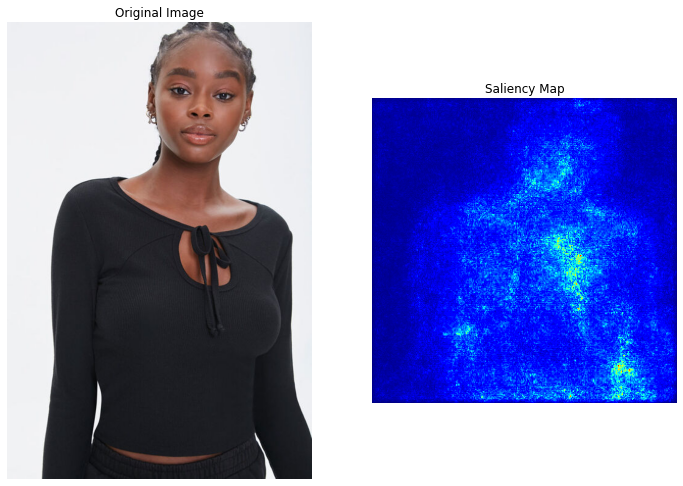



Title: Ribbed Tie-Neck Top
Actual: a ribbed knit top featuring a self tie round neckline chest cutout and long sleeves
Generated: top with a detachable tie belt and long sleeves                                                    


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

id = 14815

photo_url = df_validation[df_validation.img_id == id].img_path.values[0]
photo = load_image(photo_url)
photo = tf.reshape(photo,(1,photo.shape[0],photo.shape[1],photo.shape[2]))
title = df_validation[df_validation.img_id == id].title.values[0]
actual_caption = df_validation[df_validation.img_id == id].description.values[0]
predicted_caption = df_validation[df_validation.img_id == id].pred_cap.values[0]


saliency_map = saliency(loss,
                        photo,
                        smooth_samples=20, # The number of calculating gradients iterations.
                        smooth_noise=0.2) # noise spread level.
saliency_map = normalize(saliency_map)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,9))

img = cv2.imread(df_validation[df_validation.img_id == id].img_path.values[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

ax[0].imshow(img)
ax[0].axis('off')
ax[0].set_title('Original Image')
ax[1].imshow(saliency_map[0], cmap='jet')
ax[1].axis('off')
ax[1].set_title('Saliency Map')
plt.show()

print("\n\nTitle:", title)
print("Actual:", actual_caption)
print("Generated:", predicted_caption)

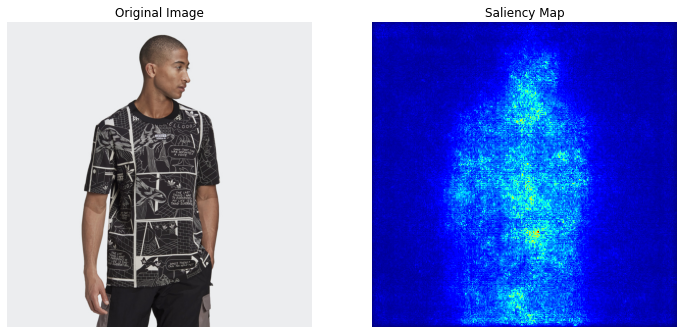



Title: adidas R.Y.V. Graphic Tee - Black | adidas US
Actual: build draw dance self expression comes in many forms pull on this brand tee and get started as a reminder to always share your true self with the world a unique allover print designed by toronto based artist patrick kyle decorates this soft t shirt our cotton products support sustainable cotton farming this is part of our ambition to end plastic waste
Generated: the bold print gives this clockhouse sweatshirt a modern look                                                   


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

id = 1877

photo_url = df_validation[df_validation.img_id == id].img_path.values[0]
photo = load_image(photo_url)
photo = tf.reshape(photo,(1,photo.shape[0],photo.shape[1],photo.shape[2]))
title = df_validation[df_validation.img_id == id].title.values[0]
actual_caption = df_validation[df_validation.img_id == id].description.values[0]
predicted_caption = df_validation[df_validation.img_id == id].pred_cap.values[0]


saliency_map = saliency(loss,
                        photo,
                        smooth_samples=20, # The number of calculating gradients iterations.
                        smooth_noise=0.2) # noise spread level.
saliency_map = normalize(saliency_map)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,9))

img = cv2.imread(df_validation[df_validation.img_id == id].img_path.values[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

ax[0].imshow(img)
ax[0].axis('off')
ax[0].set_title('Original Image')
ax[1].imshow(saliency_map[0], cmap='jet')
ax[1].axis('off')
ax[1].set_title('Saliency Map')
plt.show()

print("\n\nTitle:", title)
print("Actual:", actual_caption)
print("Generated:", predicted_caption)

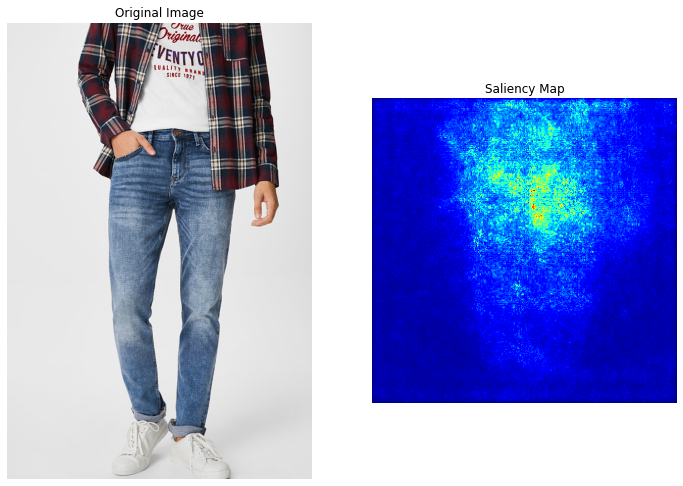



Title: THE SLIM JEANS
Actual: distinctive garment washed effects and whiskering give these stretch jeans a subtle rock style
Generated: neck jeans with a cool garment washed effects                                                     


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

id = 3847

photo_url = df_validation[df_validation.img_id == id].img_path.values[0]

photo = load_image(photo_url)
photo = tf.reshape(photo,(1,photo.shape[0],photo.shape[1],photo.shape[2]))
title = df_validation[df_validation.img_id == id].title.values[0]
actual_caption = df_validation[df_validation.img_id == id].description.values[0]
predicted_caption = df_validation[df_validation.img_id == id].pred_cap.values[0]


saliency_map = saliency(loss,
                        photo,
                        smooth_samples=20, # The number of calculating gradients iterations.
                        smooth_noise=0.2) # noise spread level.
saliency_map = normalize(saliency_map)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,9))

img = cv2.imread(df_validation[df_validation.img_id == id].img_path.values[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

ax[0].imshow(img)
ax[0].axis('off')
ax[0].set_title('Original Image')
ax[1].imshow(saliency_map[0], cmap='jet')
ax[1].axis('off')
ax[1].set_title('Saliency Map')
plt.show()

print("\n\nTitle:", title)
print("Actual:", actual_caption)
print("Generated:", predicted_caption)